# Demo for styringsmøte den 10.03.2025

NB! må kjøre konverting av filer seksjonen først

## Installere pakker


In [5]:
pip install -r requirements.txt


[notice] A new release of pip is available: 25.0 -> 25.0.1
[notice] To update, run: /usr/local/bin/python3.12 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.




## Importering av pakker

In [4]:
import os
import pyarrow.parquet as pq
import geopandas as gpd
import pandas as pd
import datetime
import glob
import json
import time as time_module
from shapely.geometry import box
from IPython.display import display
import folium

## Konstante variabler

In [51]:
ROTMAPPE = "/Users/christine/00 Bachelortesting/00 geolake/kaidata_geolake/data"
PARTISJON_MAPPE_HOUR = f"{ROTMAPPE}/partisjonert_time"
PARTISJON_MAPPE_MIN = "./data/partisjonert_10min"

## Filtrering
Leser, filtrere og analysere geografiske data fra en GeoParquet-fil basert på gitte kriterier

In [7]:
# Les geoparquet-filen
fil_sti = f"{ROTMAPPE}/raw/hais_2025-03-01.snappy.parquet"

gdf = gpd.read_parquet(fil_sti)

# Filtrering basert på attributt/kolonne
if 'date_time_utc' in gdf.columns:
    filtrert_på_dato = gdf[gdf['date_time_utc'] >= '2025-03-01 20:00:00']
    print(f"Antall rader etter datofiltrering: {len(filtrert_på_dato)}")
    display(filtrert_på_dato.head())

# Filtrering basert på geometri (f.eks. et område)
område = box(5.0, 59.5, 11.0, 60.5) # Bergen-Kristiansand-Oslo
innenfor_område = gdf[gdf.geometry.intersects(område)]
print(f"Antall rader innenfor det definerte området: {len(innenfor_område)}")
display(innenfor_område.head())

# Kombinert filtrering med flere kriterier til å analysere f.eks. overlapping
if 'attributt' in gdf.columns:
    kombinert_filter = gdf[(gdf.geometry.intersects(område)) & (gdf['attributt'] > 10)]
    print(f"Antall rader etter kombinert filtrering: {len(kombinert_filter)}")
    display(kombinert_filter.head())

Antall rader etter datofiltrering: 1148957


,date_time_utc,mmsi,longitude,latitude,status,course_over_ground,true_heading,speed_over_ground,rate_of_turn,maneuvre,...,callsign,ship_name,ship_type,length,draught,data_source,ais_class,hex_7,hex_14,geometry
32083,2025-03-01 23:59:42,258027670,10.481153,59.391950,5.0,251.7,86.0,0.0,0.0,0.0,...,LF7532,RESCUE W. WILHELMSEN,51,14,0.00,G,A,608154817323335679,639680014698855799,POINT (10.48115 59.39195)
32084,2025-03-01 23:59:33,257646600,7.191807,62.737137,5.0,360.0,511.0,0.0,-128.0,0.0,...,LG8421,FF CHARLIE,51,12,1.00,G,A,608130158339031039,639655355719738271,POINT (7.19181 62.73714)
32085,2025-03-01 23:59:33,258364500,7.814275,63.102993,5.0,309.5,194.0,0.2,0.0,0.0,...,LK7545,BOEROEY,79,15,3.00,G,A,608130167751049215,639655365128686759,POINT (7.81428 63.10299)
32086,2025-03-01 23:59:30,257961900,5.735943,58.972533,5.0,46.0,225.0,0.0,0.0,0.0,...,LMSJ,RYGERFJORD,49,20,1.50,G,A,608153258904518655,639678456292758175,POINT (5.73594 58.97253)
32087,2025-03-01 23:59:27,258364500,7.814275,63.102993,5.0,230.4,194.0,0.0,0.0,0.0,...,LK7545,BOEROEY,79,15,3.00,G,A,608130167751049215,639655365128686759,POINT (7.81428 63.10299)


Antall rader innenfor det definerte området: 1411561


,date_time_utc,mmsi,longitude,latitude,status,course_over_ground,true_heading,speed_over_ground,rate_of_turn,maneuvre,...,callsign,ship_name,ship_type,length,draught,data_source,ais_class,hex_7,hex_14,geometry
2,2025-03-01 05:59:49,257249000,10.729468,59.910393,5.0,305.4,18.0,0.0,0.0,0.0,...,LCDF,DRONNINGEN,60,50,3.30,G,A,608154808599183359,639680005986865239,POINT (10.72947 59.91039)
44,2025-03-01 05:56:53,257249000,10.729470,59.910405,5.0,315.2,18.0,0.0,0.0,0.0,...,LCDF,DRONNINGEN,60,50,3.30,G,A,608154808599183359,639680005986865239,POINT (10.72947 59.9104)
87,2025-03-01 05:53:50,257249000,10.729427,59.910392,5.0,320.4,18.0,0.0,0.0,0.0,...,LCDF,DRONNINGEN,60,50,3.30,G,A,608154808599183359,639680005986865167,POINT (10.72943 59.91039)
124,2025-03-01 05:50:51,257249000,10.729482,59.910468,5.0,326.7,18.0,0.0,0.0,0.0,...,LCDF,DRONNINGEN,60,50,3.30,G,A,608154808599183359,639680005986865927,POINT (10.72948 59.91047)
161,2025-03-01 05:47:49,257249000,10.729460,59.910373,5.0,329.9,18.0,0.0,0.0,0.0,...,LCDF,DRONNINGEN,60,50,3.30,G,A,608154808599183359,639680005986865383,POINT (10.72946 59.91037)


1. Funksjoner

In [12]:
def les_geoparquet(fil_sti):
    """Leser en GeoParquet-fil og returnerer en GeoDataFrame"""
    return gpd.read_parquet(fil_sti)

def filtrer_på_dato(gdf, dato_kolonne, start_dato):
    """Filtrerer GeoDataFrame basert på dato"""
    if dato_kolonne not in gdf.columns:
        print(f"ADVARSEL: Kolonnen '{dato_kolonne}' finnes ikke i datasettet")
        return gdf

    filtrert = gdf[gdf[dato_kolonne] >= start_dato]
    print(f"Antall rader etter datofiltrering: {len(filtrert)}")
    return filtrert

def filtrer_på_område(gdf, min_x, min_y, max_x, max_y):
    """Filtrerer GeoDataFrame basert på et geografisk område"""
    område = box(min_x, min_y, max_x, max_y)
    filtrert = gdf[gdf.geometry.intersects(område)]
    print(f"Antall rader innenfor det definerte området: {len(filtrert)}")
    return filtrert

def filtrer_på_attributt(gdf, attributt, verdi, operator='større'):
    """Filtrerer GeoDataFrame basert på et attributt"""
    if attributt not in gdf.columns:
        print(f"ADVARSEL: Kolonnen '{attributt}' finnes ikke i datasettet")
        return gdf

    if operator == 'større':
        filtrert = gdf[gdf[attributt] > verdi]
    elif operator == 'mindre':
        filtrert = gdf[gdf[attributt] < verdi]
    elif operator == 'lik':
        filtrert = gdf[gdf[attributt] == verdi]
    else:
        print(f"ADVARSEL: Ukjent operator '{operator}'")
        return gdf

    print(f"Antall rader etter attributtfiltrering: {len(filtrert)}")
    return filtrert

def kombiner_filtre(gdf, område_filter=None, dato_filter=None, attributt_filter=None):
    """Kombinerer flere filtre på en GeoDataFrame"""
    resultat = gdf.copy()

    if område_filter:
        min_x, min_y, max_x, max_y = område_filter
        område = box(min_x, min_y, max_x, max_y)
        resultat = resultat[resultat.geometry.intersects(område)]

    if dato_filter:
        kolonne, start_dato = dato_filter
        if kolonne in resultat.columns:
            resultat = resultat[resultat[kolonne] >= start_dato]

    if attributt_filter:
        kolonne, verdi, operator = attributt_filter
        if kolonne in resultat.columns:
            if operator == 'større':
                resultat = resultat[resultat[kolonne] > verdi]
            elif operator == 'mindre':
                resultat = resultat[resultat[kolonne] < verdi]
            elif operator == 'lik':
                resultat = resultat[resultat[kolonne] == verdi]

    print(f"Antall rader etter kombinert filtrering: {len(resultat)}")
    return resultat

def analyser_ais_data():
    # MÅ HENTE RIKTIG FIL!
    fil_sti = f"{ROTMAPPE}/raw/hais_2025-01-01.snappy.parquet"

    # Les data
    gdf = les_geoparquet(fil_sti)
    print(f"Totalt antall rader i datasettet: {len(gdf)}")

    # Enkle filtreringer
    gdf_dato = filtrer_på_dato(gdf, 'date_time_utc', '2025-03-01 12:00:00')
    gdf_område = filtrer_på_område(gdf, 5.0, 59.5, 11.0, 60.5)

    # Kombinert filtrering
    gdf_kombinert = kombiner_filtre(
        gdf,
        område_filter=(5.0, 59.5, 11.0, 60.5),
        attributt_filter=('attributt', 10, 'større')
    )

    return {
        'original': gdf,
        'dato_filtrert': gdf_dato,
        'område_filtrert': gdf_område,
        'kombinert_filtrert': gdf_kombinert
    }

2. Innledende analyse av datasett

In [9]:
# Oppsett og lesing av data
fil_sti = f"{ROTMAPPE}/raw/hais_2025-03-01.snappy.parquet"
gdf = les_geoparquet(fil_sti)

# Vise grunnleggende datasettinfo
print(f"Totalt antall rader i datasettet: {len(gdf)}")
print(f"Kolonner i datasettet: {list(gdf.columns)}")
gdf.head()

Totalt antall rader i datasettet: 7493506
Kolonner i datasettet: ['date_time_utc', 'mmsi', 'longitude', 'latitude', 'status', 'course_over_ground', 'true_heading', 'speed_over_ground', 'rate_of_turn', 'maneuvre', 'imo', 'callsign', 'ship_name', 'ship_type', 'length', 'draught', 'data_source', 'ais_class', 'hex_7', 'hex_14', 'geometry']


,date_time_utc,mmsi,longitude,latitude,status,course_over_ground,true_heading,speed_over_ground,rate_of_turn,maneuvre,...,callsign,ship_name,ship_type,length,draught,data_source,ais_class,hex_7,hex_14,geometry
0,2025-03-01 05:59:52,257642000,5.503408,61.054943,0.0,155.1,313.0,0.0,0.0,0.0,...,LFEA,AMPERE,69,80,3.00,G,A,608155991158030335,639681188545728631,POINT (5.50341 61.05494)
1,2025-03-01 05:59:50,257961900,5.735925,58.972540,0.0,234.9,225.0,0.0,0.0,0.0,...,LMSJ,RYGERFJORD,49,20,1.50,G,A,608153258904518655,639678456292758175,POINT (5.73592 58.97254)
2,2025-03-01 05:59:49,257249000,10.729468,59.910393,5.0,305.4,18.0,0.0,0.0,0.0,...,LCDF,DRONNINGEN,60,50,3.30,G,A,608154808599183359,639680005986865239,POINT (10.72947 59.91039)
3,2025-03-01 05:59:42,257642000,5.503410,61.054943,0.0,155.1,313.0,0.0,0.0,0.0,...,LFEA,AMPERE,69,80,3.00,G,A,608155991158030335,639681188545728631,POINT (5.50341 61.05494)
4,2025-03-01 05:59:39,257961900,5.735925,58.972533,0.0,234.9,225.0,0.0,0.0,0.0,...,LMSJ,RYGERFJORD,49,20,1.50,G,A,608153258904518655,639678456292758175,POINT (5.73592 58.97253)


3. Tidsbasert analyse

In [11]:
# Filtrere på dato
gdf_dato = filtrer_på_dato(gdf, 'date_time_utc', '2025-03-01 11:00:00')
gdf_dato.head()

Antall rader etter datofiltrering: 4168572


,date_time_utc,mmsi,longitude,latitude,status,course_over_ground,true_heading,speed_over_ground,rate_of_turn,maneuvre,...,callsign,ship_name,ship_type,length,draught,data_source,ais_class,hex_7,hex_14,geometry
3602,2025-03-01 11:59:57,257249000,10.729032,59.910148,0.0,357.7,20.0,0.0,0.0,0.0,...,LCDF,DRONNINGEN,60,50,3.30,G,A,608154808599183359,639680005986863863,POINT (10.72903 59.91015)
3603,2025-03-01 11:59:53,219332000,5.355890,58.829002,0.0,31.9,332.0,1.1,-16.0,0.0,...,OZHP2,DAN CISNE,80,207,8.00,G,A,608153250113257471,639678447494060375,POINT (5.35589 58.829)
3604,2025-03-01 11:59:52,258177000,10.396312,63.438058,0.0,350.7,44.0,0.0,3.0,0.0,...,LLVI,LADEJARL,40,35,2.00,G,A,608128168359886847,639653365737116367,POINT (10.39631 63.43806)
3605,2025-03-01 11:59:51,257642000,5.503433,61.054957,0.0,156.6,312.0,0.0,0.0,0.0,...,LFEA,AMPERE,69,80,3.00,G,A,608155991158030335,639681188545728583,POINT (5.50343 61.05496)
3606,2025-03-01 11:59:49,257961900,5.735967,58.972567,0.0,234.9,223.0,0.0,0.0,0.0,...,LMSJ,RYGERFJORD,49,20,1.50,G,A,608153258904518655,639678456292758231,POINT (5.73597 58.97257)


3. Geografisk analyse

Antall rader innenfor det definerte området: 1411561


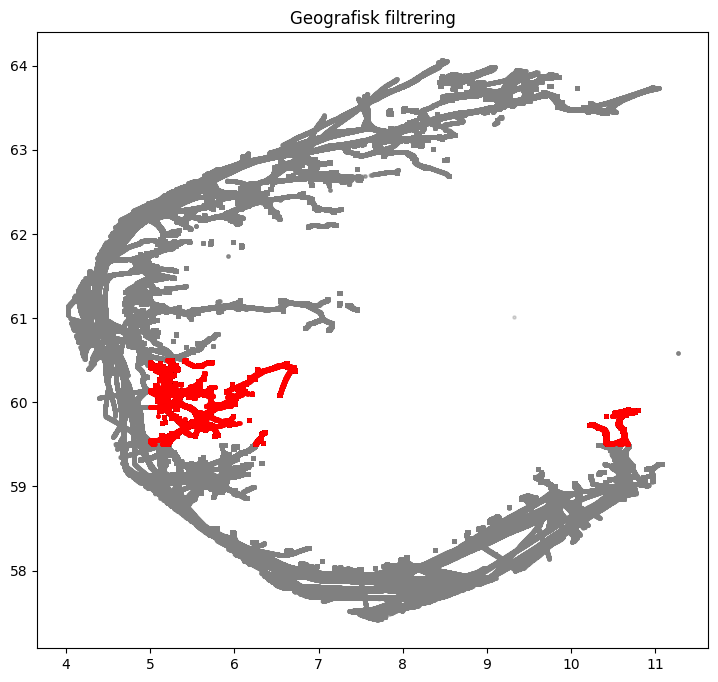

In [13]:
# Filtrere på geografisk område
gdf_område = filtrer_på_område(gdf, 5.0, 59.5, 11.0, 60.5)

# Kanskje vise et kart med området og punktene
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10, 8))
gdf.plot(ax=ax, color='gray', alpha=0.3, markersize=5)
gdf_område.plot(ax=ax, color='red', markersize=5)
ax.set_title('Geografisk filtrering')
plt.show()

4. Kombinert analyse

In [16]:
# Kombinert filtrering for mer spesifikke analyseformål basert på speed_over_ground
gdf_kombinert = kombiner_filtre(
    gdf,
    område_filter=(5.0, 60.0, 11.0, 60.0),  # Filtrerer geografi
    attributt_filter=('speed_over_ground', 10, 'større')  # Filtrerer skip med hastighet > 10 knop
)

# Vis de første radene av det filtrerte datasettet
print(f"Antall skip innenfor området med hastighet over 10 knop: {len(gdf_kombinert)}")
display(gdf_kombinert.head())

Antall rader etter kombinert filtrering: 2
Antall skip innenfor området med hastighet over 10 knop: 2


,date_time_utc,mmsi,longitude,latitude,status,course_over_ground,true_heading,speed_over_ground,rate_of_turn,maneuvre,...,callsign,ship_name,ship_type,length,draught,data_source,ais_class,hex_7,hex_14,geometry
1270754,2025-03-01 16:22:32,257010590,5.318267,60.0,0.0,27.0,30.0,10.4,0.0,0.0,...,LACJ8,GRAND CANYON III,90,128,6.70,G,A,608153198204551167,639678395580490023,POINT (5.31827 60)
3655237,2025-03-01 15:11:46,257042930,5.309045,60.0,0.0,339.1,343.0,11.5,0.0,0.0,...,LETP,HUSAVIK,60,66,3.80,G,A,608153198204551167,639678395593449775,POINT (5.30904 60)


## Partisjonering
Partisjonerer geografiske skipstrafikkdata basert på tid og skipstype

1. Konstanter

In [17]:
ROTMAPPE = "./data"
PARTISJON_MAPPE_HOUR = os.path.join(ROTMAPPE, "partisjonert_time")
PARTISJON_MAPPE_MIN = os.path.join(ROTMAPPE, "partisjonert_10min")

2. Funksjoner

In [24]:
# Opprett mappene for partisjonering
os.makedirs(PARTISJON_MAPPE_HOUR, exist_ok=True)
os.makedirs(PARTISJON_MAPPE_MIN, exist_ok=True)

def opprett_mappe(mappesti):
    """Oppretter en mappe hvis den ikke eksisterer"""
    os.makedirs(mappesti, exist_ok=True)
    return mappesti

def partisjonering_base(data, målfolder, partisjoneringstype, kolonne_navn, tidsformat_func=None):
    """Generisk partisjonering for både time og 10-minutters intervaller

    Args:
        data: DataFrame som skal partisjoneres
        målfolder: Målmappen for partisjonering
        partisjoneringstype: 'time' eller '10min'
        kolonne_navn: Navn på kolonnen som skal brukes for partisjonering
        tidsformat_func: Funksjon for å formatere partisjoneringsmappen
    """
    # Lag en kopi for å unngå SettingWithCopyWarning
    data_kopi = data.copy()

    # Sikre at ship_type har konsistent datatype (int64)
    if 'ship_type' in data_kopi.columns:
        data_kopi['ship_type'] = data_kopi['ship_type'].astype('int64')

    # Opprett kolonne basert på partisjoneringstype
    if partisjoneringstype == 'time':
        data_kopi.loc[:, kolonne_navn] = data_kopi['date_time_utc'].dt.hour
    elif partisjoneringstype == '10min':
        data_kopi.loc[:, kolonne_navn] = (
            data_kopi['date_time_utc'].dt.hour * 6 +
            data_kopi['date_time_utc'].dt.minute // 10
        )

    # Opprett hovedmappen
    opprett_mappe(målfolder)

    antall_filer = 0
    antall_rader = 0

    # Gruppering og partisjonering
    for tidsverdi, gruppe_tid in data_kopi.groupby(kolonne_navn):
        # Lag mappenavn basert på tidsverdi
        if tidsformat_func:
            tidsmappe = os.path.join(målfolder, tidsformat_func(tidsverdi))
        else:
            tidsmappe = os.path.join(målfolder, f"{kolonne_navn}={tidsverdi:02d}")

        opprett_mappe(tidsmappe)

        # Videre partisjonering på skipstype
        for ship_type, gruppe_final in gruppe_tid.groupby('ship_type'):
            skip_mappe = os.path.join(tidsmappe, f"ship_type={ship_type}")
            opprett_mappe(skip_mappe)

            # Lag kopi som skal lagres
            data_å_lagre = gruppe_final.copy()

            # Fjern partisjoneringskolonnen før lagring
            fil_sti = os.path.join(skip_mappe, "data.parquet")
            data_å_lagre.drop(kolonne_navn, axis=1).to_parquet(fil_sti)

            print(f"Skrevet {len(gruppe_final)} rader til {fil_sti}")
            antall_filer += 1
            antall_rader += len(gruppe_final)

    return {'antall_filer': antall_filer, 'antall_rader': antall_rader}

def lag_time_partisjon(data, målfolder):
    """Partisjonerer geodata basert på time og skipstype"""
    return partisjonering_base(data, målfolder, 'time', 'time')

def lag_10min_partisjon(data, målfolder):
    """Partisjonerer geodata basert på 10-minutters intervaller og skipstype"""
    def tidsformat_func(minuttgruppe):
        time = minuttgruppe // 6
        minutt = (minuttgruppe % 6) * 10
        return f"time_minutt={time:02d}_{minutt:02d}"

    return partisjonering_base(data, målfolder, '10min', 'minuttgruppe', tidsformat_func)

def les_partisjonerte_data(rotmappesti, filter_func=None, filter_verdi=None, filternavn=None):
    """Generisk funksjon for å lese partisjonerte data

    Args:
        rotmappesti: Sti til rotmappen med partisjonerte data
        filter_func: Funksjon for å filtrere stier basert på filter_verdi
        filter_verdi: Verdi som skal brukes for filtrering
        filternavn: Navn på filteret for utskrift
    """
    if filter_func and filter_verdi:
        stier = filter_func(rotmappesti, filter_verdi)
        if not stier:
            print(f"Ingen data funnet for {filternavn} {filter_verdi}")
            return None

        print(f"Leser data for {filternavn} {filter_verdi}...")
        dataframes = []
        for fil in stier:
            try:
                gdf = gpd.read_parquet(fil)
                # Konvertere ship_type til int64 for å sikre kompatibilitet
                if 'ship_type' in gdf.columns:
                    gdf['ship_type'] = gdf['ship_type'].astype('int64')
                dataframes.append(gdf)
            except Exception as e:
                print(f"Feil ved lesing av {fil}: {e}")

        if dataframes:
            try:
                data = pd.concat(dataframes, ignore_index=True)
                print(f"Hentet {len(data)} rader for {filternavn} {filter_verdi}")
                return data
            except Exception as e:
                print(f"Feil ved sammenslåing av dataframes: {e}")
                # Fallback - returner første dataframe hvis noe går galt
                if len(dataframes) > 0:
                    print(f"Returnerer bare første dataframe med {len(dataframes[0])} rader")
                    return dataframes[0]
    return None

def les_partisjonerte_data_for_måned(rotmappesti, ønsket_måned):
    """Leser partisjonerte data for en spesifikk måned"""
    def filter_måned(rotmappesti, måned):
        måned_sti = os.path.join(rotmappesti, f"år_måned={måned}")
        if not os.path.exists(måned_sti):
            return []
        return glob.glob(os.path.join(måned_sti, "**/*.parquet"), recursive=True)

    return les_partisjonerte_data(rotmappesti, filter_måned, ønsket_måned, "måned")

def les_partisjonerte_data_for_skipstype(rotmappesti, ønsket_skipstype):
    """Leser partisjonerte data for en spesifikk skipstype"""
    def filter_skipstype(rotmappesti, skipstype):
        return glob.glob(os.path.join(rotmappesti, f"**/ship_type={skipstype}/*.parquet"), recursive=True)

    return les_partisjonerte_data(rotmappesti, filter_skipstype, ønsket_skipstype, "skipstype")

# Teste at mappestrukturen er opprettet
print(f"Mappestruktur opprettet:")
print(f"- Time-partisjonering: {PARTISJON_MAPPE_HOUR}")
print(f"- 10-minutters partisjonering: {PARTISJON_MAPPE_MIN}")

# Kode for å utføre faktisk partisjonering
def utfør_partisjonering():
    """Utfører partisjonering basert på time og 10-minutters intervaller"""
    print("\nStarter partisjonering av data...")

    # Les inn datasettet
    fil_sti = f"{ROTMAPPE}/raw/hais_2025-03-01.snappy.parquet"
    try:
        gdf = gpd.read_parquet(fil_sti)
        print(f"Leste {len(gdf)} rader fra {fil_sti}")

        # Filtrer data til et bestemt geografisk område
        område = box(5.0, 59.5, 11.0, 60.5)
        innenfor_område = gdf[gdf.geometry.intersects(område)]
        print(f"Filtrert til {len(innenfor_område)} rader innenfor angitt område")

        # Partisjonering basert på time
        print("\nStarter timebasert partisjonering...")
        resultat_time = lag_time_partisjon(innenfor_område, PARTISJON_MAPPE_HOUR)
        print(f"\nTimebasert partisjonering fullført:")
        print(f"- Antall filer opprettet: {resultat_time['antall_filer']}")
        print(f"- Totalt antall rader lagret: {resultat_time['antall_rader']}")

        # Partisjonering basert på 10-minutters intervaller
        print("\nStarter 10-minutters partisjonering...")
        resultat_10min = lag_10min_partisjon(innenfor_område, PARTISJON_MAPPE_MIN)
        print(f"\n10-minutters partisjonering fullført:")
        print(f"- Antall filer opprettet: {resultat_10min['antall_filer']}")
        print(f"- Totalt antall rader lagret: {resultat_10min['antall_rader']}")

        return True
    except Exception as e:
        print(f"Feil ved partisjonering: {e}")
        return False

    utfør_partisjonering()

Mappestruktur opprettet:
- Time-partisjonering: ./data/partisjonert_time
- 10-minutters partisjonering: ./data/partisjonert_10min


3. Dataforberedelse

In [25]:
# Les inn datasettet
fil_sti = f"{ROTMAPPE}/raw/hais_2025-03-01.snappy.parquet"
gdf = gpd.read_parquet(fil_sti)
print(f"Totalt antall rader i datasettet: {len(gdf)}")

# Filtrer data til et bestemt geografisk område
område = box(5.0, 60.0, 11.0, 60.0)
innenfor_område = gdf[gdf.geometry.intersects(område)]
print(f"Antall rader innenfor området: {len(innenfor_område)}")

# Vis første rader
display(innenfor_område.head())

Totalt antall rader i datasettet: 7493506
Antall rader innenfor området: 3


,date_time_utc,mmsi,longitude,latitude,status,course_over_ground,true_heading,speed_over_ground,rate_of_turn,maneuvre,...,callsign,ship_name,ship_type,length,draught,data_source,ais_class,hex_7,hex_14,geometry
151139,2025-03-01 09:46:07,257874500,5.230817,60.0,0.0,153.8,153.0,9.8,-127.0,0.0,...,LG9010,BRATTO,30,15,2.20,G,A,608153198724644863,639678396106335759,POINT (5.23082 60)
1270754,2025-03-01 16:22:32,257010590,5.318267,60.0,0.0,27.0,30.0,10.4,0.0,0.0,...,LACJ8,GRAND CANYON III,90,128,6.70,G,A,608153198204551167,639678395580490023,POINT (5.31827 60)
3655237,2025-03-01 15:11:46,257042930,5.309045,60.0,0.0,339.1,343.0,11.5,0.0,0.0,...,LETP,HUSAVIK,60,66,3.80,G,A,608153198204551167,639678395593449775,POINT (5.30904 60)


4. Timebasert partisjonering

In [26]:
# Partisjonering basert på time
resultat_time = lag_time_partisjon(innenfor_område, PARTISJON_MAPPE_HOUR)

# Oppsummering
print(f"\nTimebasert partisjonering fullført:")
print(f"- Antall filer opprettet: {resultat_time['antall_filer']}")
print(f"- Totalt antall rader lagret: {resultat_time['antall_rader']}")

Skrevet 1 rader til ./data/partisjonert_time/time=09/ship_type=30/data.parquet
Skrevet 1 rader til ./data/partisjonert_time/time=15/ship_type=60/data.parquet
Skrevet 1 rader til ./data/partisjonert_time/time=16/ship_type=90/data.parquet

Timebasert partisjonering fullført:
- Antall filer opprettet: 3
- Totalt antall rader lagret: 3


5. 10-minutters partisjonering

In [27]:
# Partisjonering basert på 10-minutters intervaller
resultat_10min = lag_10min_partisjon(innenfor_område, PARTISJON_MAPPE_MIN)

# Oppsummering
print(f"\n10-minutters partisjonering fullført:")
print(f"- Antall filer opprettet: {resultat_10min['antall_filer']}")
print(f"- Totalt antall rader lagret: {resultat_10min['antall_rader']}")

Skrevet 1 rader til ./data/partisjonert_10min/time_minutt=09_40/ship_type=30/data.parquet
Skrevet 1 rader til ./data/partisjonert_10min/time_minutt=15_10/ship_type=60/data.parquet
Skrevet 1 rader til ./data/partisjonert_10min/time_minutt=16_20/ship_type=90/data.parquet

10-minutters partisjonering fullført:
- Antall filer opprettet: 3
- Totalt antall rader lagret: 3


6. Les partisjonert data for en spesifikk måned

In [28]:
# Definer ønsket måned
ønsket_måned = "2025-03"

# Les data for den valgte måneden
månedsdata = les_partisjonerte_data_for_måned(PARTISJON_MAPPE_HOUR, ønsket_måned)

# Vis data hvis tilgjengelig
if månedsdata is not None:
    display(månedsdata.head())

    # Lag en enkel visualisering
    fig, ax = plt.subplots(figsize=(10, 8))
    månedsdata.plot(ax=ax, column='ship_type', cmap='viridis', legend=True)
    ax.set_title(f'Skipstrafikk i {ønsket_måned}')
    plt.show()

Ingen data funnet for måned 2025-03


7. Les partisjonerte data for en spesifikk skipstype

In [35]:
import pyarrow as pa
import pyarrow.parquet as pq
from IPython.display import display

def les_partisjonerte_data_for_skipstype(rotmappesti, ønsket_skipstype):
    """
    Robust versjon av lesefunksjonen som håndterer datatypeinkonsistenser.
    Leser data for en spesifikk skipstype fra partisjonerte filer.
    """
    print(f"Leser data for skipstype {ønsket_skipstype}...")

    # Finn alle filer for den spesifikke skipstypen
    skipstype_stier = glob.glob(os.path.join(rotmappesti, f"**/ship_type={ønsket_skipstype}/*.parquet"), recursive=True)

    if not skipstype_stier:
        print(f"Ingen data funnet for skipstype {ønsket_skipstype}")
        return None

    # Les hver fil individuelt
    alle_data = []
    for fil in skipstype_stier:
        try:
            # Prøv å lese med pyarrow først for å håndtere datatyper mer robust
            try:
                # Les schema først
                parquet_file = pq.ParquetFile(fil)
                schema = parquet_file.schema

                # Sjekk om ship_type finnes og endre datatypen hvis nødvendig
                modified_schema = schema
                for i, field in enumerate(schema):
                    if field.name == 'ship_type' and pa.types.is_dictionary(field.type):
                        # Konverter dictionary-kodet ship_type til int64
                        fields = list(schema)
                        fields[i] = pa.field('ship_type', pa.int64())
                        modified_schema = pa.schema(fields)

                # Les data med modifisert schema
                table = pq.read_table(fil, schema=modified_schema)
                df = table.to_pandas()

                # Konverter til GeoPandas hvis nødvendig
                if 'geometry' in df.columns:
                    import shapely.wkt
                    if isinstance(df['geometry'].iloc[0], str):
                        df['geometry'] = df['geometry'].apply(shapely.wkt.loads)
                    df = gpd.GeoDataFrame(df, geometry='geometry')

            except Exception as e:
                print(f"PyArrow-lesing feilet: {e}, prøver GeoDataFrame direkte")
                # Prøv vanlig lesing som backup
                df = gpd.read_parquet(fil)

            # Legg til ship_type-kolonne manuelt siden den er i mappenavn
            if 'ship_type' not in df.columns:
                df['ship_type'] = int(ønsket_skipstype)
            else:
                # Sikre at ship_type er riktig datatype
                df['ship_type'] = df['ship_type'].astype('int64')

            alle_data.append(df)
            print(f"Lest {len(df)} rader fra {fil}")

        except Exception as e:
            print(f"Kunne ikke lese {fil}: {e}")
            # Fortsett med neste fil i stedet for å avbryte
            continue

    # Sjekk om vi har noen data
    if not alle_data:
        print(f"Ingen lesbare data funnet for skipstype {ønsket_skipstype}")
        return None

    # Hvis vi bare har én dataframe, returner den
    if len(alle_data) == 1:
        return alle_data[0]

    # Kombinere alle dataframes
    try:
        # Metode 1: Normal concat
        combined = pd.concat(alle_data, ignore_index=True)
        print(f"Hentet {len(combined)} rader for skipstype {ønsket_skipstype}")
        return combined
    except Exception as e:
        print(f"Kunne ikke kombinere data med pd.concat: {e}")

        # Metode 2: Manuell kombinering
        try:
            # Finn felles kolonner
            alle_kolonner = set()
            for df in alle_data:
                alle_kolonner.update(df.columns)

            # Sikre at alle dataframes har samme kolonner og datatyper
            for i, df in enumerate(alle_data):
                # Håndter manglende kolonner
                manglende = alle_kolonner - set(df.columns)
                for kolonne in manglende:
                    alle_data[i][kolonne] = None

                # Sikre at ship_type er int64
                if 'ship_type' in alle_data[i].columns:
                    alle_data[i]['ship_type'] = alle_data[i]['ship_type'].astype('int64')

            # Prøv igjen
            combined = pd.concat(alle_data, ignore_index=True)
            print(f"Hentet {len(combined)} rader for skipstype {ønsket_skipstype} etter manuell kolonnehåndtering")
            return combined
        except Exception as e2:
            print(f"Kunne ikke kombinere data selv etter kolonnehåndtering: {e2}")

            # Metode 3: Prøv å kombinere en og en
            try:
                print("Prøver å kombinere dataframes en og en...")
                result = alle_data[0].copy()
                for i in range(1, len(alle_data)):
                    try:
                        # Justerer kolonner og datatyper
                        df = alle_data[i]
                        common_cols = set(result.columns) & set(df.columns)
                        result = pd.concat([result[common_cols], df[common_cols]], ignore_index=True)
                    except Exception as e3:
                        print(f"Kunne ikke legge til dataframe {i}: {e3}")

                print(f"Kombinerte {len(result)} rader ved manuell metode")
                return result
            except Exception as e3:
                print(f"Alle kombinasjonsmetoder feilet: {e3}")

                # Metode 4: Returner første dataframe som en siste utvei
                print(f"Returnerer kun første dataframe med {len(alle_data[0])} rader")
                return alle_data[0]

def visualiser_skipstype(skipstype_id, save_results=False):
    print(f"Analyserer data for skipstype {skipstype_id}...")

    # Les data for den valgte skipstypen
    skipsdata = les_partisjonerte_data_for_skipstype(PARTISJON_MAPPE_HOUR, skipstype_id)

    # Sjekk om vi har data å jobbe med
    if skipsdata is None or len(skipsdata) == 0:
        print(f"Ingen data funnet for skipstype {skipstype_id}")
        return None

    # Vis oversikt over dataene
    print(f"Funnet {len(skipsdata)} datapunkter for skipstype {skipstype_id}")
    display(skipsdata.head())

    # Lag visualiseringer
    try:
        # Enkelt kart hvis vi har geometridata
        if 'geometry' in skipsdata.columns:
            print("Lager kartvisualisering...")
            skipsdata_map = skipsdata.plot(figsize=(12, 8), alpha=0.5, edgecolor='k')
            skipsdata_map.set_title(f"Posisjoner for skipstype {skipstype_id}")
            display(skipsdata_map.figure)

        # Histogram over hastighet hvis tilgjengelig
        if 'speed' in skipsdata.columns:
            print("Lager hastighetsfordeling...")
            import matplotlib.pyplot as plt
            plt.figure(figsize=(10, 6))
            skipsdata['speed'].hist(bins=30)
            plt.title(f"Hastighetsfordeling for skipstype {skipstype_id}")
            plt.xlabel("Hastighet (knop)")
            plt.ylabel("Antall observasjoner")
            plt.tight_layout()
            plt.show()

    except Exception as e:
        print(f"Kunne ikke lage visualiseringer: {e}")

    # Lagre resultater hvis ønsket
    if save_results and skipsdata is not None:
        try:
            output_path = f"skipstype_{skipstype_id}_analyse.parquet"
            skipsdata.to_parquet(output_path)
            print(f"Data lagret til {output_path}")
        except Exception as e:
            print(f"Kunne ikke lagre data: {e}")

    return skipsdata

# Alternative lesemetode for problemfiler - leser filen direkte
def les_problematisk_parquet(filsti, ønsket_skipstype):
    """
    Forsøker å lese en problematisk parquet-fil ved å bruke pyarrow direkte
    og konvertere dictionary-kodede kolonner til riktig format.
    """
    try:
        # Les tabellen og konvertere til pandas
        table = pq.read_table(filsti)
        df = table.to_pandas()

        # Hvis ship_type finnes, sikre at det er riktig type
        if 'ship_type' in df.columns:
            df['ship_type'] = df['ship_type'].astype('int64')
        else:
            df['ship_type'] = int(ønsket_skipstype)

        # Konvertere til geodataframe hvis geometry-kolonne finnes
        if 'geometry' in df.columns:
            import shapely.wkt
            if isinstance(df['geometry'].iloc[0], str):
                df['geometry'] = df['geometry'].apply(shapely.wkt.loads)
            df = gpd.GeoDataFrame(df, geometry='geometry')

        return df
    except Exception as e:
        print(f"Kunne ikke lese fil med alternativ metode: {e}")
        return None

# Definer ønsket skipstype og kjør visualisering
ønsket_skipstype = 90  # F.eks. passasjerskip
skipsdata = visualiser_skipstype(ønsket_skipstype, save_results=False)

# Hvis det fortsatt feiler, prøv problemfilen direkte
if skipsdata is None:
    print("Prøver å lese problemfilen direkte...")
    problem_fil = "./data/partisjonert_time/time=16/ship_type=90/data.parquet"
    direkte_data = les_problematisk_parquet(problem_fil, ønsket_skipstype)
    if direkte_data is not None and len(direkte_data) > 0:
        print(f"Lyktes med å lese {len(direkte_data)} rader direkte fra problemfilen")
        display(direkte_data.head())

Analyserer data for skipstype 90...
Leser data for skipstype 90...
PyArrow-lesing feilet: 'pyarrow._parquet.ColumnSchema' object has no attribute 'type', prøver GeoDataFrame direkte
Kunne ikke lese ./data/partisjonert_time/time=16/ship_type=90/data.parquet: Unable to merge: Field ship_type has incompatible types: int64 vs dictionary<values=int32, indices=int32, ordered=0>
Ingen lesbare data funnet for skipstype 90
Ingen data funnet for skipstype 90
Prøver å lese problemfilen direkte...
Kunne ikke lese fil med alternativ metode: Unable to merge: Field ship_type has incompatible types: int64 vs dictionary<values=int32, indices=int32, ordered=0>


## Simulering av datastrømming

1. Konstanter

In [47]:
PARTISJON_MAPPE_MIN = os.path.join(ROTMAPPE, "partisjonert_10min")

2. Funksjoner

In [57]:
from IPython.core.display_functions import clear_output
import re

def finn_minutt_intervaller(hovedmappe):
    """Finn alle minutt-mapper sortert kronologisk"""
    return sorted([d for d in os.listdir(hovedmappe) if d.startswith("time_minutt=")])

def les_data_for_intervall(intervall_sti):
    """Les og kombiner alle geoparquet-filer for et gitt intervall"""
    filer = glob.glob(os.path.join(intervall_sti, "**/*.parquet"), recursive=True)

    intervall_data = []
    for fil in filer:
        try:
            gdf = gpd.read_parquet(fil)

            # Sikre at ship_type er int64
            if 'ship_type' in gdf.columns:
                gdf['ship_type'] = gdf['ship_type'].astype('int64')

            intervall_data.append(gdf)
        except Exception as e:
            print(f"Kunne ikke lese {fil}: {e}")

    if intervall_data:
        return pd.concat(intervall_data, ignore_index=True), len(filer)
    else:
        return None, 0

def beregn_statistikk(data):
    """Beregn og returner statistikk for datasettet"""
    return {
        "gjennomsnittlig_hastighet": data['speed_over_ground'].mean(),
        "antall_unike_skip": data['mmsi'].nunique(),
        "totalt_antall_rader": len(data)
    }

def vis_skip_på_kart(data, tidspunkt):
    """Opprett et kart med skipsbevegelser"""
    # Konverter til WGS84 koordinatsystem hvis nødvendig
    if data.crs and data.crs != "EPSG:4326":
        data = data.to_crs("EPSG:4326")

    # Beregn senterpunkt for kartet
    midpoint_lat = data.geometry.centroid.y.mean()
    midpoint_lon = data.geometry.centroid.x.mean()

    # Opprett et kart sentrert på dataenes midtpunkt
    m = folium.Map(location=[midpoint_lat, midpoint_lon], zoom_start=10)

    # Legg til en tittel
    tittel_html = f'''
    <h3 align="center" style="font-size:16px"><b>Skipsbevegelser: {tidspunkt}</b></h3>
    '''
    m.get_root().html.add_child(folium.Element(tittel_html))

    # Fargekoding basert på skipstype
    ship_type_colors = {
        30: 'blue',      # Fiskefartøy
        31: 'green',     # Slepebåt
        52: 'red',       # Passasjerskip
        60: 'purple',    # Passasjerskip
        70: 'orange',    # Lasteskip
        80: 'darkblue',  # Tankskip
        # Legg til flere skipstyper etter behov
    }

    # Legg til skip på kartet
    legg_til_skip_på_kart(m, data, ship_type_colors)

    # Legg til tegnforklaring
    legg_til_tegnforklaring(m, ship_type_colors)

    # Returner kartet
    return m

def legg_til_skip_på_kart(kart, data, farger):
    """Legg til hvert skip på kartet med ikoner og retningspiler"""
    for idx, row in data.iterrows():
        # Bestem farge basert på skipstype
        color = farger.get(row['ship_type'], 'gray')

        # Hent koordinater
        coords = (row.geometry.y, row.geometry.x)

        # Lag popup-info
        popup_text = f"""
        <b>Skip:</b> {row['ship_name']}<br>
        <b>MMSI:</b> {row['mmsi']}<br>
        <b>Type:</b> {row['ship_type']}<br>
        <b>Hastighet:</b> {row['speed_over_ground']} knop<br>
        <b>Kurs:</b> {row['course_over_ground']}°<br>
        <b>Tidspunkt:</b> {row['date_time_utc']}
        """

        # Legg til markør med retningspil
        folium.Marker(
            coords,
            popup=folium.Popup(popup_text, max_width=300),
            icon=folium.Icon(color=color, icon='ship', prefix='fa'),
            tooltip=f"{row['ship_name']} ({row['mmsi']})"
        ).add_to(kart)

        # Tegn retningspil hvis kurs er tilgjengelig
        if not pd.isna(row['course_over_ground']):
            folium.RegularPolygonMarker(
                coords,
                fill_color=color,
                number_of_sides=3,
                radius=8,
                rotation=row['course_over_ground'],
                fill_opacity=0.6,
                color='black',
                weight=1
            ).add_to(kart)

def legg_til_tegnforklaring(kart, farger):
    """Legg til tegnforklaring på kartet"""
    legend_html = '''
    <div style="position: fixed;
                bottom: 50px; right: 50px; width: 150px; height: 160px;
                border:2px solid grey; z-index:9999; font-size:12px;
                background-color: white; padding: 10px;
                border-radius: 5px;">
    <b>Skipstyper:</b><br>
    '''

    for ship_type, color in farger.items():
        legend_html += f'<i class="fa fa-ship" style="color:{color}"></i> Type {ship_type}<br>'

    legend_html += '</div>'
    kart.get_root().html.add_child(folium.Element(legend_html))

def hent_tidspunkt_fra_mappe(mappe_navn):
    """Hent time og minutt fra mappenavnet"""
    match = re.search(r"time_minutt=(\d{2})_(\d{2})", mappe_navn)
    if match:
        time, minutt = match.groups()
        return time, minutt
    return None, None

def simuler_datastrømming(hovedmappe, pause_sekunder=0.5, lagre_kart=False):
    """Simuler datastrømming med visualisering av skipsbevegelser"""
    # Finn alle intervaller
    alle_intervaller = finn_minutt_intervaller(hovedmappe)

    print("\nSimulerer datastrømming med visualisering...")
    for intervall_dir in alle_intervaller:
        # Hent time og minutt fra mappenavnet
        time, minutt = hent_tidspunkt_fra_mappe(intervall_dir)
        if not time or not minutt:
            continue

        tidspunkt = f"{time}:{minutt}"
        intervall_sti = os.path.join(hovedmappe, intervall_dir)

        # Vis prosesseringsinformasjon
        clear_output(wait=True)  # Fjern forrige output i notebook
        print(f"\nProsesserer data for {tidspunkt}...")

        # Les data for dette intervallet
        samlet_data, antall_filer = les_data_for_intervall(intervall_sti)

        if samlet_data is not None:
            # Beregn statistikk
            stats = beregn_statistikk(samlet_data)

            # Vis statistikker
            print(f"Kl. {tidspunkt}: Lastet {stats['totalt_antall_rader']} rader fra {antall_filer} filer")
            print(f"  Gjennomsnittlig hastighet (SOG): {stats['gjennomsnittlig_hastighet']:.2f}")
            print(f"  Antall unike skip: {stats['antall_unike_skip']}")

            # Opprett og vis kart
            kart = vis_skip_på_kart(samlet_data, f"Kl. {tidspunkt}")

            # Lagre kartet til en HTML-fil hvis ønsket
            if lagre_kart:
                kart_filnavn = f"kart_{time}_{minutt}.html"
                kart.save(kart_filnavn)
                print(f"  Kart lagret som {kart_filnavn}")

            # Vis kartet i notebook
            display(kart)
        else:
            print(f"Ingen data funnet for kl. {tidspunkt}")

        # Simuler tid mellom intervaller
        time_module.sleep(pause_sekunder)

    print("\nDatastrømming komplett!")

3. Simulering og visualisering

In [58]:
simuler_datastrømming(PARTISJON_MAPPE_MIN, pause_sekunder=0.5, lagre_kart=False)


Datastrømming komplett!
